In [6]:
%pip install python-binance pandas numpy statsmodels

from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd
import numpy as np
import os

client = bnb_client(tld='US')


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
def get_binance_px(symbol, freq='1d', start_ts='2020-01-01', end_ts='2024-12-31'):
    data = client.get_historical_klines(symbol, freq, start_ts, end_ts)
    columns = [
        'open_time','open','high','low','close','volume','close_time',
        'quote_volume','num_trades','taker_base_volume','taker_quote_volume','ignore'
    ]
    df = pd.DataFrame(data, columns=columns)

    # Convert to UTC
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms', utc=True)
    df.set_index('open_time', inplace=True)

    df = df[['open','high','low','close','volume']]
    for col in ['open','high','low','close','volume']:
        df[col] = df[col].astype(float)

    return df

In [5]:
univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT']

freq = '1d'
os.makedirs('../data/raw', exist_ok=True)

for ticker in univ:
    df = get_binance_px(ticker, freq)
    coin = ticker.replace('USDT','')
    df.to_csv(f'../data/raw/{coin}_USDT.csv')
    print(f'Saved {coin}')

Saved BTC
Saved ETH
Saved ADA
Saved BNB
Saved XRP


In [7]:
univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT']

all_coins = {}
for ticker in univ:
    coin = ticker.replace('USDT','')
    df = pd.read_csv(f'../data/raw/{coin}_USDT.csv', index_col='open_time', parse_dates=True)
    all_coins[coin] = df

print(all_coins.keys())
all_coins['BTC'].head()

dict_keys(['BTC', 'ETH', 'ADA', 'BNB', 'XRP'])


,open,high,low,close,volume
open_time,,,,,
2020-01-01 00:00:00+00:00,7180.46,7245.54,7175.62,7195.65,31.403883
2020-01-02 00:00:00+00:00,7191.39,7210.05,6934.29,6961.80,67.004407
2020-01-03 00:00:00+00:00,6958.14,7404.24,6877.78,7345.65,102.621386
2020-01-04 00:00:00+00:00,7344.55,7403.98,7282.25,7349.45,32.271372
2020-01-05 00:00:00+00:00,7363.88,7489.84,7332.96,7364.19,67.247638


In [8]:
date_range = pd.date_range(
    start='2020-01-01', 
    end='2024-12-31', 
    freq='D', 
    tz='UTC'
)

for coin, df in all_coins.items():
    all_coins[coin] = df.reindex(date_range).ffill()
    print(f"{coin}: {all_coins[coin].index.min()} to {all_coins[coin].index.max()}")

BTC: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
ETH: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
ADA: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
BNB: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
XRP: 2020-01-01 00:00:00+00:00 to 2024-12-31 00:00:00+00:00


In [9]:
all_coins.keys()

dict_keys(['BTC', 'ETH', 'ADA', 'BNB', 'XRP'])

CROSS SECTIONAL RANKING

In [10]:
lookback_days = 30  

momentum_df = pd.DataFrame(index=all_coins['BTC'].index)

for coin, df in all_coins.items():
    coin_symbol = coin.replace('USDT','')  # if your keys still have USDT
    momentum_df[coin_symbol] = df['close'].pct_change(lookback_days)

momentum_df.head(35)


,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [11]:
ranks = momentum_df.rank(axis=1, ascending=False, method='min')
ranks.head(40)

,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN


In [12]:
num_coins = len(momentum_df.columns)
top_pct = 0.4  

top_cutoff = int(num_coins * top_pct)
if top_cutoff == 0:
    top_cutoff = 1  # Always at least one coin

long_positions = ranks <= top_cutoff

# Check
print(ranks.loc['2020-02-01'])
print(long_positions.loc['2020-02-01'])


BTC    4.0
ETH    2.0
ADA    1.0
BNB    3.0
XRP    5.0
Name: 2020-02-01 00:00:00+00:00, dtype: float64
BTC    False
ETH     True
ADA     True
BNB    False
XRP    False
Name: 2020-02-01 00:00:00+00:00, dtype: bool


In [13]:
daily_rets = pd.DataFrame(index=momentum_df.index)

for coin, df in all_coins.items():
    coin_symbol = coin.replace('USDT','')
    daily_rets[coin_symbol] = df['close'].pct_change()

daily_rets.head(40)


,BTC,ETH,ADA,BNB,XRP
2020-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00+00:00,-0.032499,-0.025283,-0.022116,-0.049133,-0.027926
2020-01-03 00:00:00+00:00,0.055137,0.052900,0.040037,0.046120,0.029741
2020-01-04 00:00:00+00:00,0.000517,0.000523,0.011167,0.012574,-0.002226
2020-01-05 00:00:00+00:00,0.002006,0.009029,0.004069,0.017572,0.009597
2020-01-06 00:00:00+00:00,0.056128,0.064705,0.077569,0.063839,0.143973
2020-01-07 00:00:00+00:00,0.051020,-0.007570,-0.005103,0.005712,-0.039660
2020-01-08 00:00:00+00:00,-0.014970,-0.013997,-0.017009,-0.029884,-0.027875
2020-01-09 00:00:00+00:00,-0.028273,-0.019945,-0.007141,-0.010495,-0.018042
2020-01-10 00:00:00+00:00,0.047375,0.045191,0.020194,0.043402,0.036453


In [14]:
daily_rets.loc['2020-02-02']

BTC   -0.005962
ETH    0.026667
ADA   -0.009785
BNB    0.010785
XRP    0.040415
Name: 2020-02-02 00:00:00+00:00, dtype: float64

/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35975/2154156374.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  portfolio_cum = (1 + portfolio_ret.fillna(0)).cumprod()


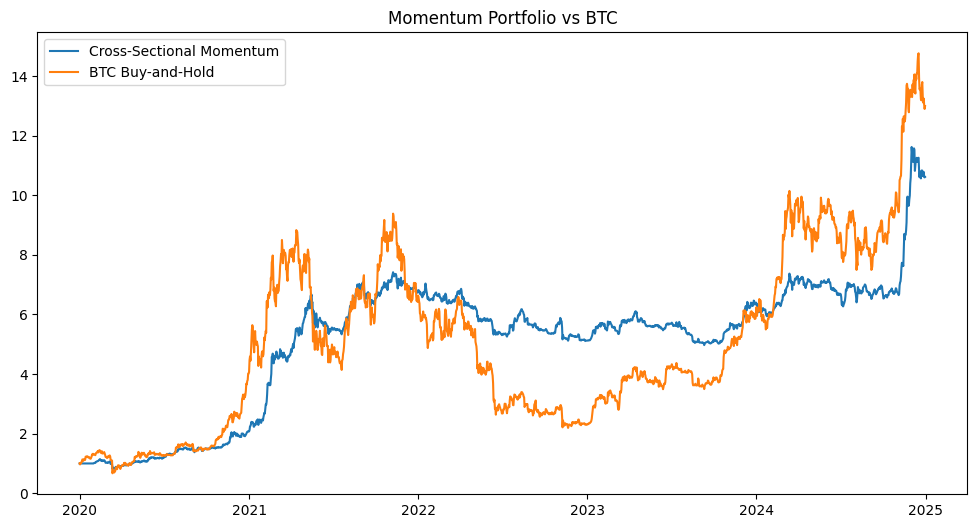

In [15]:
portfolio_ret = (daily_rets * long_positions.shift(1)).mean(axis=1)

# BTC Beta
btc_ret = daily_rets['BTC']

# Cumulative returns
portfolio_cum = (1 + portfolio_ret.fillna(0)).cumprod()
btc_cum = (1 + btc_ret.fillna(0)).cumprod()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(portfolio_cum, label='Cross-Sectional Momentum')
plt.plot(btc_cum, label='BTC Buy-and-Hold')
plt.legend()
plt.title('Momentum Portfolio vs BTC')
plt.show()

In [17]:
lookbacks = [15, 30, 60, 90]
top_pcts = [0.2, 0.4, 0.6]
results = []

for lb in lookbacks:
    signal = pd.DataFrame(index=momentum_df.index)
    for coin, df in all_coins.items():
        signal[coin] = df['close'].pct_change(lb)

    # Ranks
    ranks = signal.rank(axis=1, ascending=False)
    
    for tp in top_pcts:
        num_coins = len(signal.columns)
        cutoff = max(int(num_coins * tp), 1)
        mask = ranks <= cutoff

        # P&L
        pnl = (daily_rets * mask.shift(1)).mean(axis=1)
        sharpe = (pnl.mean() / pnl.std()) * np.sqrt(252)
        results.append({'lookback': lb, 'top_pct': tp, 'sharpe': sharpe})

results_df = pd.DataFrame(results)
pivot = results_df.pivot(index='lookback', columns='top_pct', values='sharpe')
print(pivot)


top_pct        0.2       0.4       0.6
lookback                              
15        1.354089  1.762980  1.588361
30        1.186745  1.382599  1.485901
60        0.966297  1.201290  1.247515
90        0.916873  1.343716  1.326019


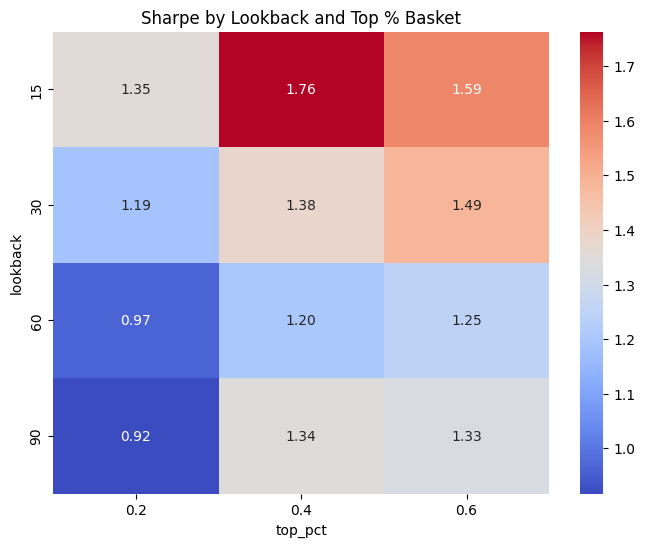

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sharpe by Lookback and Top % Basket')
plt.show()

In [49]:
gt_df = pd.read_csv('crypto5search.csv', skiprows=1)  # Try skiprows=1 or skiprows=2 depending on the CSV
gt_df = gt_df.rename(columns={
    'Week': 'date',
    'bitcoin price: (United States)': 'sentiment_score'
})
gt_df = gt_df[gt_df['date'].str.contains('-')]

gt_df['date'] = pd.to_datetime(gt_df['date'])
gt_df = gt_df.set_index('date')

# Weekly → Daily: ffill to fill each week’s value forward
gt_daily = gt_df.resample('D').ffill()

if gt_daily.index.tz is None:
    gt_daily.index = gt_daily.index.tz_localize('UTC')
else:
    gt_daily.index = gt_daily.index.tz_convert('UTC')
# Align to overlap with your crypto factor
start_date = max(gt_daily.index.min(), all_coins['BTC'].index.min())
end_date   = min(gt_daily.index.max(), all_coins['BTC'].index.max())

gt_daily = gt_daily.loc[start_date:end_date]
gt_daily = gt_daily.reindex(all_coins['BTC'].loc[start_date:end_date].index)

sentiment_df = pd.DataFrame({'sentiment_score': gt_daily['sentiment_score']})
print(sentiment_df.head(10))
print(sentiment_df.tail(10))

                           sentiment_score
2020-07-05 00:00:00+00:00                8
2020-07-06 00:00:00+00:00                8
2020-07-07 00:00:00+00:00                8
2020-07-08 00:00:00+00:00                8
2020-07-09 00:00:00+00:00                8
2020-07-10 00:00:00+00:00                8
2020-07-11 00:00:00+00:00                8
2020-07-12 00:00:00+00:00                7
2020-07-13 00:00:00+00:00                7
2020-07-14 00:00:00+00:00                7
                           sentiment_score
2024-12-22 00:00:00+00:00               41
2024-12-23 00:00:00+00:00               41
2024-12-24 00:00:00+00:00               41
2024-12-25 00:00:00+00:00               41
2024-12-26 00:00:00+00:00               41
2024-12-27 00:00:00+00:00               41
2024-12-28 00:00:00+00:00               41
2024-12-29 00:00:00+00:00               37
2024-12-30 00:00:00+00:00               37
2024-12-31 00:00:00+00:00               37


In [50]:
median_sentiment = sentiment_df['sentiment_score'].median()
print(f"Median sentiment: {median_sentiment:.2f}")


Median sentiment: 25.00


In [51]:
high_sentiment = sentiment_df['sentiment_score'] > median_sentiment


In [52]:
start_date = sentiment_df.index.min()
end_date = sentiment_df.index.max()

portfolio_ret_trimmed = portfolio_ret.loc[start_date:end_date]

In [54]:
# Safe shift + fill
mask_on  = high_sentiment.shift(1).loc[start_date:end_date].fillna(False)
mask_off = ~mask_on

pnl_sent_on  = portfolio_ret_trimmed * mask_on
pnl_sent_off = portfolio_ret_trimmed * mask_off


/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35975/3461495704.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_on  = high_sentiment.shift(1).loc[start_date:end_date].fillna(False)


/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35975/3705828557.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.plot((1 + pnl_sent_on.fillna(0)).cumprod(), label='High Sentiment Regime')
/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35975/3705828557.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plt.plot((1 + pnl_sent_off.fillna(0)).cumprod(), label='Low Sentiment Regime')
/var/folders/rv/rzmfgtcs4dbc86tj60p89ly80000gn/T/ipykernel_35975/3705828557.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffil

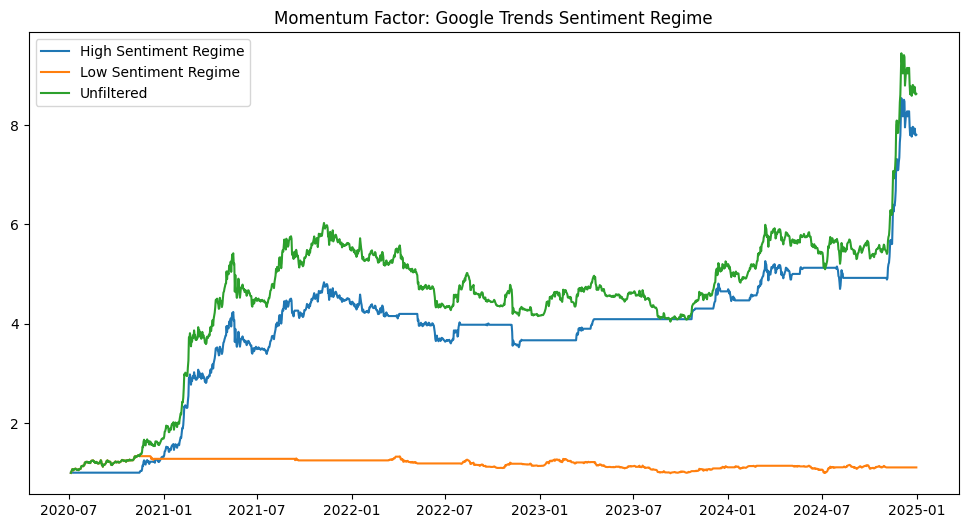

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot((1 + pnl_sent_on.fillna(0)).cumprod(), label='High Sentiment Regime')
plt.plot((1 + pnl_sent_off.fillna(0)).cumprod(), label='Low Sentiment Regime')
plt.plot((1 + portfolio_ret_trimmed.fillna(0)).cumprod(), label='Unfiltered')
plt.title('Momentum Factor: Google Trends Sentiment Regime')
plt.legend()
plt.show()


In [56]:
def annualized_sharpe(ret):
    return (ret.mean() / ret.std()) * np.sqrt(252)

print("Sharpe (High Sentiment):", annualized_sharpe(pnl_sent_on))
print("Sharpe (Low Sentiment):", annualized_sharpe(pnl_sent_off))
print("Sharpe (Unfiltered):", annualized_sharpe(portfolio_ret_trimmed))


Sharpe (High Sentiment): 1.5332657502243092
Sharpe (Low Sentiment): 0.18995223616627882
Sharpe (Unfiltered): 1.4437775763730465


Twitter

In [60]:
# Install if needed
%pip install snscrape vaderSentiment kagglehub

import snscrape.modules.twitter as sntwitter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from datetime import datetime, timedelta


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import kagglehub

# Download dataset to ./data directory
path = kagglehub.dataset_download("kaushiksuresh147/bitcoin-tweets")
print("Path to dataset files:", path)

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 41%|████▏     | 287M/695M [01:32<04:27, 1.60MB/s] 

In [ ]:
import pandas as pd

df = pd.read_csv(f"{path}/bitcoin_tweets.csv")  # adjust filename if needed
print(df.head(5))
print(df.columns)